<a href="https://colab.research.google.com/github/exmbd/homework/blob/main/%5B%EC%8B%A4%EC%8A%B502%5D_Transformation%EC%9C%BC%EB%A1%9C_TIE_Fighter_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 선언

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

INF = 1000  # 그림판 크기
LEN = 100   # 처음 사각형의 크기

### 축 그리기 및 사각형 그리기

In [2]:
def draw_axis(ax):
  ax.axhline(0, color='black', alpha=0.3)  # x-axis line
  ax.axvline(0, color='black', alpha=0.3)  # y-axis line
  ax.set_xlim(-INF, INF)
  ax.set_ylim(-INF, INF)
  ax.set_aspect('equal')  # 정사각형 모양으로 backboard 그리기

In [3]:
def draw_rectangle(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)

### 본론
#### 1. 변환 구현
* translate(p, dx, dy)
* rotate(p, theta)  
* scale(p, sx, sy)  
* shear_x(p, sx)  
* shear_y(p, sy)  
* reflect_x(p)  
* reflect_y(p)   
* reflect_0(p)
* reflect_yx(p)

In [4]:
# 점 p를 x축 방향으로 dx만큼, y축 방향으로 dy만큼 이동시킨 점 q를 구할 것
# q = T(dx, dy) p1
def translate(p, dx, dy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)
  
  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [5]:
# 점 p를 반시계 방향으로 theta만큼 회전시킨 점 q를 구할 것
# q = R(theta) p1
def rotate(p, theta):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 회전 변환 행렬 생성
  m = np.array([[np.cos(theta), -1*np.sin(theta), 0.0], [np.sin(theta), np.cos(theta), 0.0], [0.0, 0.0, 1.0]])

  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)

  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [6]:
# 점 p를 x축 방향으로 sx만큼, y축 방향으로 sy만큼 확대 또는 축소한 점 q를 구할 것
# q = S(sx, sy) p1
def scale(p, sx, sy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 크기 변환 행렬 생성
  m = np.array([[sx, 0.0, 0.0], [0.0, sy, 0.0], [0.0, 0.0, 1.0]])

  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)
  
  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [7]:
# 점 p를 x축에 대해 sx만큼 기울기를 변환한 점 q를 구할 것
# q = Shx(sx)
def shear_x(p, sx):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. x축에 대한 기울기 변환 행렬 생성
  m = np.array([[1.0, sx, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])

  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)
  
  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [8]:
# 점 p를 x축에 대해 sy만큼 기울기를 변환한 점 q를 구할 것
# q = Shy(sy)
def shear_y(p, sy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. y축에 대한 기울기 변환 행렬 생성
  m = np.array([[1.0, 0.0, 0.0], [sy, 1.0, 0.0], [0.0, 0.0, 1.0]])

  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)
  
  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [77]:
# 점 p를 x축에 대해 반전시킨 점 q를 구할 것
# q = Rfx
def reflect_x(p):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. x축에 대한 반전 행렬 생성
  m = np.array([[1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, 1.0]])

  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)
  
  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [78]:
# 점 p를 y축에 대해 반전시킨 점 q를 구할 것
# q = Rfy
def reflect_y(p):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. y축에 대한 반전 행렬 생성
  m = np.array([[-1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])

  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)
  
  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [11]:
# 점 p를 원점에 대해 반전시킨 점 q를 구할 것
# q = Rf0
def reflect_0(p):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 원점에 대한 반전 행렬 생성
  m = np.array([[-1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, 1.0]])

  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)
  
  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [12]:
# 점 p를 y=x에 대해 반전시킨 점 q를 구할 것
# q = Rfy=x
def reflect_yx(p):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 원점에 대한 반전 행렬 생성
  m = np.array([[0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])

  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)
  
  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

#### 2. 파트 그리기
* draw_cockpit(p1, p2, p3, p4)    # 중앙 조종석
* draw_left_arm(p1, p2, p3, p4)   # 왼쪽 날개축
* draw_left_wing(p1, p2, p3, p4)  # 왼쪽 날개
* draw_right_arm(p1, p2, p3, p4)  # 오른쪽 날개축
* draw_right_wing(p1, p2, p3, p4) # 오른쪽 날개

In [13]:
# 중앙 조종석
def draw_cockpit(ax, p1, p2, p3, p4):  
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 2. 크기 변환: S(5, 5)
  s = 5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)
 
  # 3. 회전 변환: R(pi/4)
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)

  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

In [88]:
# 왼쪽 날개축
def draw_left_arm(ax, p1, p2, p3, p4):
  q1 = translate(p1, 0.0, 140.0)
  q2 = translate(p2, 420.0, 0.0)
  q3 = translate(p3, 750.0, -1*LEN)
  q4 = translate(p4, 0.0, 160.0)
  
  r1 = reflect_x(q1)
  r2 = reflect_x(q2)
  r3 = reflect_x(q3)
  r4 = reflect_x(q4)

  draw_rectangle(ax, q1, q2, q3, q4)
  draw_rectangle(ax, r1, r2, r3, r4)

In [94]:
# 왼쪽 날개
def draw_left_wing(ax, p1, p2, p3, p4):  
  q1 = translate(p1, 0.0, -350.0)
  q2 = translate(p2, 0.0, -500.0)
  q3 = translate(p3, 0.0, 500.0)
  q4 = translate(p4, 0.0, 350.0)

  q1 = scale(q1, 1.3, 1.0)
  q2 = scale(q2, 1.3, 1.0)
  q3 = scale(q3, 1.3, 1.0)
  q4 = scale(q4, 1.3, 1.0)

  q1 = translate(q1, 710.0, -LEN/2)
  q2 = translate(q2, 710.0, -LEN/2)
  q3 = translate(q3, 710.0, -LEN/2)
  q4 = translate(q4, 710.0, -LEN/2)

  draw_rectangle(ax, q1, q2, q3, q4)

In [103]:
# 오른쪽 날개축
def draw_right_arm(ax, p1, p2, p3, p4):
  q1 = translate(p1, 0.0, 140.0)
  q2 = translate(p2, 420.0, 0.0)
  q3 = translate(p3, 750.0, -1*LEN)
  q4 = translate(p4, 0.0, 160.0)
  
  r1 = reflect_y(q1)
  r2 = reflect_y(q2)
  r3 = reflect_y(q3)
  r4 = reflect_y(q4)

  s1 = reflect_x(r1)
  s2 = reflect_x(r2)
  s3 = reflect_x(r3)
  s4 = reflect_x(r4)

  draw_rectangle(ax, r1, r2, r3, r4)
  draw_rectangle(ax, s1, s2, s3, s4)

In [108]:
# 오른쪽 날개
def draw_right_wing(ax, p1, p2, p3, p4):
  q1 = translate(p1, 0.0, -350.0)
  q2 = translate(p2, 0.0, -500.0)
  q3 = translate(p3, 0.0, 500.0)
  q4 = translate(p4, 0.0, 350.0)

  q1 = scale(q1, 1.3, 1.0)
  q2 = scale(q2, 1.3, 1.0)
  q3 = scale(q3, 1.3, 1.0)
  q4 = scale(q4, 1.3, 1.0)

  q1 = reflect_y(q1)
  q2 = reflect_y(q2)
  q3 = reflect_y(q3)
  q4 = reflect_y(q4)

  q1 = translate(q1, -710.0, -LEN/2)
  q2 = translate(q2, -710.0, -LEN/2)
  q3 = translate(q3, -710.0, -LEN/2)
  q4 = translate(q4, -710.0, -LEN/2)

  draw_rectangle(ax, q1, q2, q3, q4)

In [162]:
 # 날개 디테일 추가
 def draw_detail(ax, p1, p2, p3, p4):

  s = 2.4
  q1 = scale(p1, s, s)
  q2 = scale(p2, s, s)
  q3 = scale(p3, s, s)
  q4 = scale(p4, s, s)

  q1 = shear_y(q1, 1.0)
  q2 = shear_y(q2, 1.0)
  q3 = shear_y(q3, 1.0)
  q4 = shear_y(q4, 1.0)

  q1 = reflect_y(q1)
  q2 = reflect_y(q2)
  q3 = reflect_y(q3)
  q4 = reflect_y(q4)

  q1 = scale(q1, 1.5, 0.8)
  q2 = scale(q2, 1.5, 1.0)
  q3 = scale(q3, 1.5, 0.8)
  q4 = scale(q4, 1.5, 0.8)

  q1 = translate(q1, -LEN/2, -LEN/2)
  q2 = translate(q2, -LEN/2, -LEN/2)
  q3 = translate(q3, -LEN/2, -LEN/2)
  q4 = translate(q4, -LEN/2, -LEN/2)

  a1 = translate(q1, 870.0, 400.0)
  a2 = translate(q2, 870.0, 400.0)
  a3 = translate(q3, 870.0, 400.0)
  a4 = translate(q4, 870.0, 400.0)

  b1 = reflect_x(a1)
  b2 = reflect_x(a2)
  b3 = reflect_x(a3)
  b4 = reflect_x(a4)

  c1 = reflect_y(a1)
  c2 = reflect_y(a2)
  c3 = reflect_y(a3)
  c4 = reflect_y(a4)

  d1 = reflect_x(c1)
  d2 = reflect_x(c2)
  d3 = reflect_x(c3)
  d4 = reflect_x(c4)

  draw_rectangle(ax, a1, a2, a3, a4)
  draw_rectangle(ax, b1, b2, b3, b4)
  draw_rectangle(ax, c1, c2, c3, c4)
  draw_rectangle(ax, d1, d2, d3, d4)

In [115]:
# 2. tiefigher 그리기
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  # 1. 중앙 조종석 그리기
  draw_cockpit(ax, p1, p2, p3, p4)

  # 2. 왼쪽 날개축 그리기
  draw_left_arm(ax, p1, p2, p3, p4)

  # 3. 왼쪽 날개 그리기
  draw_left_wing(ax, p1, p2, p3, p4)

  # 4. 오른쪽 날개축 그리기
  draw_right_arm(ax, p1, p2, p3, p4)

  # 5. 오른쪽 날개 그리기
  draw_right_wing(ax, p1, p2, p3, p4)

  draw_detail(ax, p1, p2, p3, p4)

### 3. main

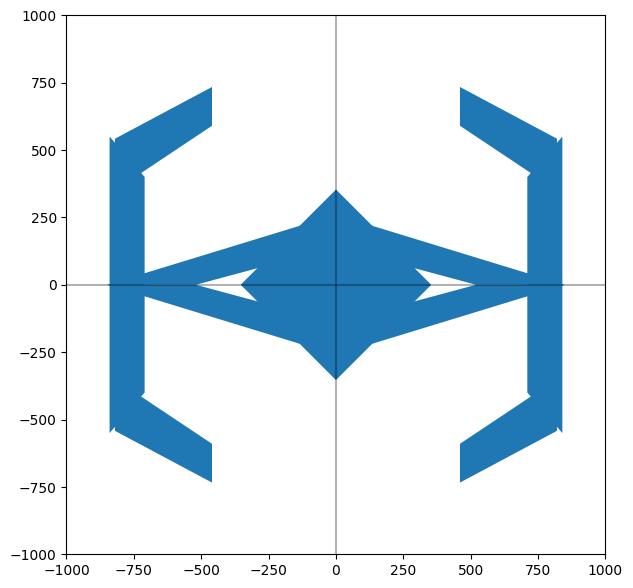

In [163]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()